# Deconvolution R2948

### Na events tagged 

In [1]:
import matplotlib
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import Core.system_of_units as units
import tables
import Core.mplFunctions as mpl
import Core.wfmFunctions as wfm

In [3]:
import Sierpe.FEE as FE

In [4]:
from scipy import signal

In [5]:
import time

In [6]:
import pandas as pd

In [7]:
from Core.coreFunctions import wait

In [8]:
from Database import loadDB

In [9]:
import ICython.Sierpe.cBLR as cblr

In [10]:
%load_ext Cython

## Revised on:

In [11]:
print(time.strftime("%d/%m/%Y"))

23/11/2016


In [12]:
print(time.strftime("%H:%M:%S"))

19:20:22


In [13]:
yield_factor = 574./690.
print('Yield factor (MC to NEW running conditions, November, 2016 = {})'.format(yield_factor))

Yield factor (MC to NEW running conditions, November, 2016 = 0.831884057971)


#### List the files

In [14]:
ls /Users/jjgomezcadenas/Documents/Development/NEXT/icdata

CalibElectrons/ CalibMC/        IC/             LSC/


In [15]:
pathmc='/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/CalibMC/'
pathel='/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/CalibElectrons/'
pathlsc='/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/LSC/'

In [16]:
ls -lh '/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/LSC/tests'

total 345640
-rw-r--r--  1 jjgomezcadenas  staff    52M Nov 23 09:46 Kr_r2609_fail_deconv.h5
-rw-r--r--@ 1 jjgomezcadenas  staff    63M Nov 22 22:34 Na_r2948_fail_deconv.h5
-rw-r--r--@ 1 jjgomezcadenas  staff    54M Nov 23 19:08 Na_r2948_fail_deconv2.h5


In [17]:
r2948_005 = tables.open_file(pathlsc+'/run2948/run_2948.gdc1next.005.next1el_2948.root.h5','r+')

In [18]:
r2948_fail = tables.open_file(pathlsc+'/tests/Na_r2948_fail_deconv.h5','r+')

In [79]:
r2948_fail2 = tables.open_file(pathlsc+'/tests/Na_r2948_fail_deconv2.h5','r+')

In [19]:
r2948_005

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/LSC//run2948/run_2948.gdc1next.005.next1el_2948.root.h5, title='', mode='r+', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/RD (Group) ''
/RD/pmtblr (EArray(132, 12, 32000), zlib(4)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 1, 32000)
/RD/pmtrwf (EArray(132, 12, 32000), zlib(4)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 1, 32000)
/RD/sipmrwf (EArray(132, 1792, 800), zlib(4)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 50, 800)
/Run (Group) ''
/Run/events (Table(132,)) ''
  description := {
  "evt_number": Int32Col(shape=(), dflt=0, pos=0),
  "timestamp": UInt64Col(shape=(), dflt=0, pos=1)}
  byteorder := 'little

In [20]:
r2948_fail

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/LSC//tests/Na_r2948_fail_deconv.h5, title=Filters(complevel=4, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None), mode='r+', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) Filters(complevel=4, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None)
/RD (Group) ''
/RD/pmtblr (EArray(57, 12, 32000), shuffle, zlib(4)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 4, 32000)
/RD/pmtcwf (EArray(57, 12, 32000), shuffle, zlib(4)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 4, 32000)
/RD/pmtrwf (EArray(57, 12, 32000), shuffle, zlib(4)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 4, 

In [21]:
DataPMT = loadDB.DataPMT(2948)

In [22]:
DataPMT

,SensorID,ChannelID,PmtID,Active,X,Y,coeff_c,coeff_blr,adc_to_pes,noise_rms,sigma
0,0,0,1,1,-23.9414,65.7785,0.000003,0.001632,-24.3395,0.7060,7.73100
1,1,18,3,1,-44.9951,-53.6231,0.000003,0.001632,-24.8580,0.8744,8.82000
2,2,1,2,1,68.9365,-12.1554,0.000003,0.001611,-26.2934,0.7213,8.01375
3,3,19,4,1,0.0000,185.0000,0.000003,0.001599,-26.4110,0.7624,8.42224
4,4,27,C,1,-118.9160,141.7180,0.000003,0.001567,-26.7098,0.7921,6.23125
5,5,26,B,1,-182.1890,32.1249,0.000004,0.001650,-22.4456,0.8660,5.65180
6,6,9,A,1,-160.2150,-92.5000,0.000003,0.001593,-23.3552,0.7062,7.37840
7,7,8,9,1,-63.2737,-173.8430,0.000003,0.001612,-33.8821,0.7278,11.94840
8,8,23,8,1,63.2737,-173.8430,0.000003,0.001601,-21.8220,0.7303,6.11073
9,9,22,7,1,160.2150,-92.5000,0.000003,0.001593,-25.8020,0.7160,7.46200


In [23]:
pmtrwf = r2948_005.root.RD.pmtrwf

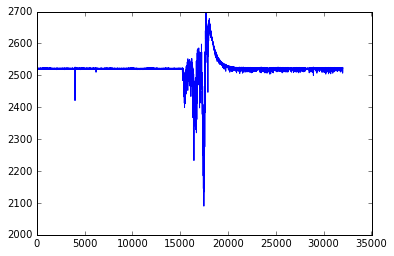

In [25]:
plt.plot(pmtrwf[0,0])

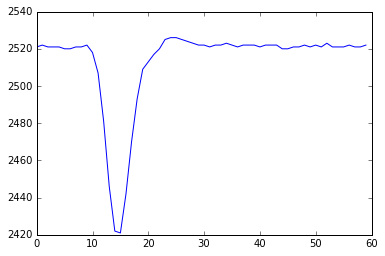

In [26]:
plt.plot(pmtrwf[0,0][3990:4050])

In [27]:
signal_r, acum, baseline, baseline_end, noise_rms = cblr.deconvolve_signal_acum(pmtrwf[0,0],
                                                                                  n_baseline=500,
                                                                                  coef_clean=DataPMT.coeff_c[0],
                                                                                  coef_blr=DataPMT.coeff_blr[0],
                                                                                  thr_trigger=5,
                                                                                  acum_discharge_length = 5000)

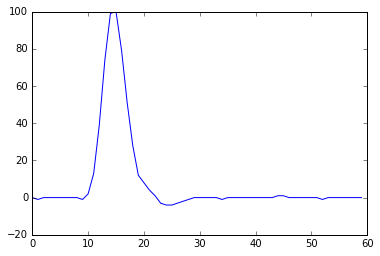

In [28]:
plt.plot(signal_r[3990:4050])

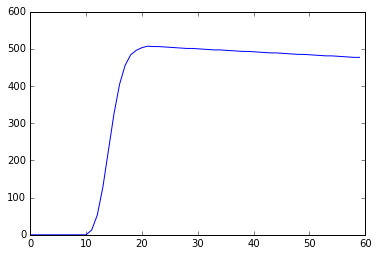

In [29]:
plt.plot(acum[3990:4050])

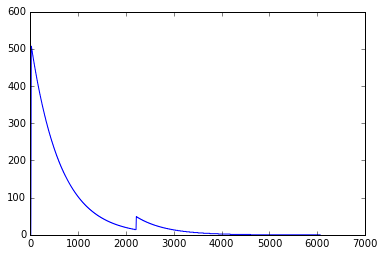

In [30]:
plt.plot(acum[3990:10050])

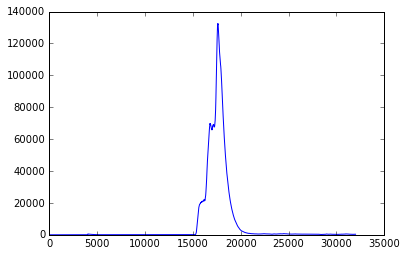

In [31]:
plt.plot(acum)

In [32]:
def compute_baseline_time(signal_i):
    from time import time
    BSL=[]
    len_signal_i = len(signal_i)
    t0 = time()
    for nm in [100, 1000, 10000, len_signal_i]:
        print('computing mean for {} samples')
        t0 = time()
        BSL.append(np.mean(signal_i[0:nm]))
        t1 = time()
        dt = t1 - t0
        print("time = {} seconds".format(dt))
    return BSL

In [33]:
def compute_baseline(signal_i, baselines=[200, 1000, 10000, 32000]):
    from time import time
    BSL = [np.mean(signal_i[0:nm]) for nm in baselines]
    BSL_RMS = [np.std(signal_i[0:nm],ddof=1) for nm in baselines]
    return BSL,BSL_RMS

In [34]:
def Baselines(pmtrwf, baselines=[200, 1000, 10000, 32000], ipmt=0, event_list=[0]):
    BSL=[]
    BSL_RMS =[]
    for event in event_list:
        bsl, bsl_rms = compute_baseline(pmtrwf[event,ipmt],baselines=baselines)
        BSL.append(bsl)
        BSL_RMS.append(bsl_rms)
    return np.array(zip(*BSL)),np.array(zip(*BSL_RMS))
    

In [35]:
BSL, BSL_RMS = Baselines(pmtrwf, baselines=[200, 1000, 10000, 32000], ipmt=0, event_list=range(100))

In [36]:
def scatter_plot(x,y, size_x=8, size_y=8, binw=0.25):
    """
    scatter plo
    """
    from matplotlib.ticker import NullFormatter

    nullfmt = NullFormatter()         # no labels

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(size_x, size_y))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    axScatter.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = binw
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth

    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))

    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    plt.show()

(array([ 72.,  27.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 2520.065,  2521.029,  2521.993,  2522.957,  2523.921,  2524.885,
         2525.849,  2526.813,  2527.777,  2528.741,  2529.705]),
 <a list of 10 Patch objects>)

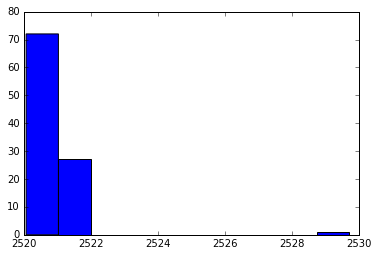

In [37]:
plt.hist(BSL[0],bins=10)

(array([ 55.,  32.,   2.,   1.,   3.,   1.,   3.,   1.,   0.,   2.]),
 array([ 0.62105033,  0.74905172,  0.87705311,  1.0050545 ,  1.13305589,
         1.26105728,  1.38905867,  1.51706006,  1.64506145,  1.77306285,
         1.90106424]),
 <a list of 10 Patch objects>)

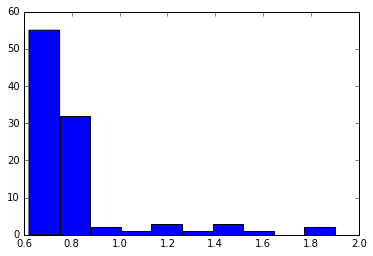

In [38]:
plt.hist(BSL_RMS[0],bins=10)

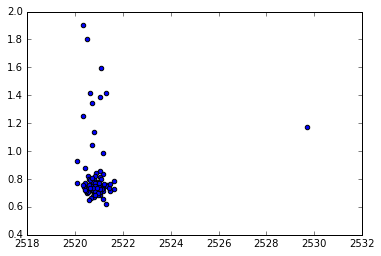

In [39]:
plt.scatter(BSL[0],BSL_RMS[0])

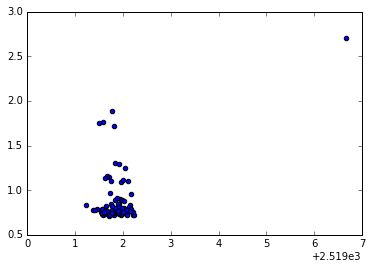

In [40]:
plt.scatter(BSL[1],BSL_RMS[1])

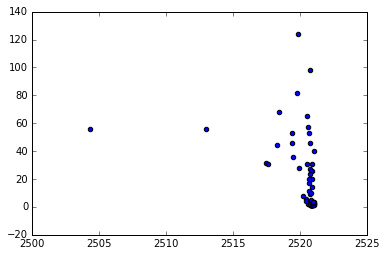

In [41]:
plt.scatter(BSL[2],BSL_RMS[2])

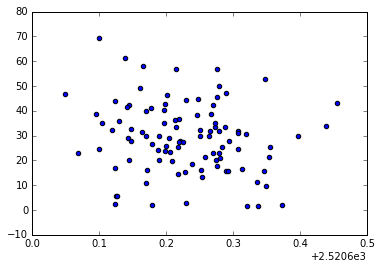

In [42]:
plt.scatter(BSL[3],BSL_RMS[3])

## Testing new deconvolution with r2948 (Na-22, trigger on S1 + external tag) 

In [46]:
event = 0
pmt = 0
signal_r, acum, baseline, baseline_end, noise_rms = cblr.deconvolve_signal_acum(pmtrwf[event,pmt],
                                                                                  n_baseline=28000,
                                                                                  coef_clean=DataPMT.coeff_c[pmt],
                                                                                  coef_blr=DataPMT.coeff_blr[pmt],
                                                                                  thr_trigger=5,
                                                                                  acum_discharge_length = 5000)

In [47]:
baseline

2520.60888671875

In [48]:
baseline_end

2520.974853515625

In [49]:
noise_rms

0.7572327852249146

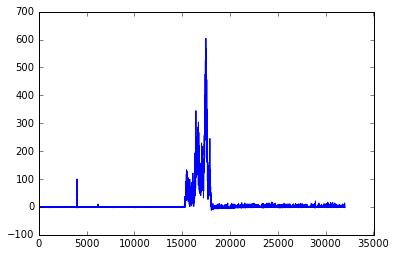

In [50]:
plt.plot(signal_r)

In [42]:
event = 0
pmt = 0
signal_r, acum, baseline, baseline_end, noise_rms = cblr.deconvolve_signal_acum_v2(pmtrwf[event,pmt],
                                                                                  n_baseline=500,
                                                                                  coef_clean=DataPMT.coeff_c[pmt],
                                                                                  coef_blr=DataPMT.coeff_blr[pmt],
                                                                                  thr_trigger=5,
                                                                                  acum_discharge_length = 5000,
                                                                                  acum_tau=2500,
                                                                                  acum_compress=0.01)

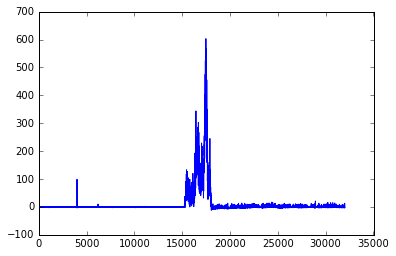

In [43]:
plt.plot(signal_r)

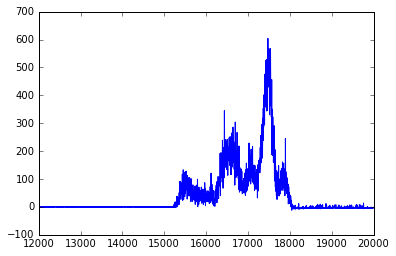

In [51]:
xmin=12000
xmax=20000
plt.plot(range(xmin,xmax),signal_r[xmin:xmax])

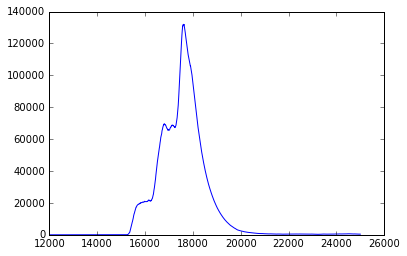

In [52]:
xmin=12000
xmax=25000
plt.plot(range(xmin,xmax),acum[xmin:xmax])

In [53]:
def deconv_pmt(pmtrwf, DataPMT, n_baseline=28000, thr_trigger=5, deconv='v1', event=0):
    """
    Deconvolution of all the PMTs in the event cython function
    """
    NPMT = pmtrwf.shape[1]
    CWF = {}
    ACUM = {}
    BASELINE = []
    BASELINE_END = []
    NOISE_RMS = []
    
    for pmt in range(NPMT):
        if deconv == 'v1':
            signal_r, acum, baseline, baseline_end, noise_rms = cblr.deconvolve_signal_acum(pmtrwf[event,pmt],
                                                                                  n_baseline=n_baseline,
                                                                                  coef_clean=DataPMT.coeff_c[pmt],
                                                                                  coef_blr=DataPMT.coeff_blr[pmt],
                                                                                  thr_trigger=thr_trigger,
                                                                                  acum_discharge_length = 5000)
            CWF[pmt] = signal_r
            ACUM[pmt] = acum
            BASELINE.append(baseline)
            BASELINE_END.append(baseline_end)
            NOISE_RMS.append(noise_rms)
            
        else:
            signal_r, acum, baseline, baseline_end, noise_rms = cblr.deconvolve_signal_acum_v2(pmtrwf[event,pmt],
                                                                                  n_baseline=400,
                                                                                  coef_clean=DataPMT.coeff_c[pmt],
                                                                                  coef_blr=DataPMT.coeff_blr[pmt],
                                                                                  thr_trigger=thr_trigger,
                                                                                  acum_discharge_length = 5000,
                                                                                  acum_tau=2500, 
                                                                                  acum_compress=0.01)
            
            CWF[pmt] = signal_r
            ACUM[pmt] = acum
            BASELINE.append(baseline)
            BASELINE_END.append(baseline_end)
            NOISE_RMS.append(noise_rms)
        
    return pd.DataFrame(CWF), pd.DataFrame(ACUM), np.array(BASELINE), np.array(BASELINE_END),np.array(NOISE_RMS)

In [54]:
CWF, ACUM, BASELINE, BASELINE_END, NOISE_RMS   = deconv_pmt(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, 
                                                            deconv='v1',
                                                            event=0)

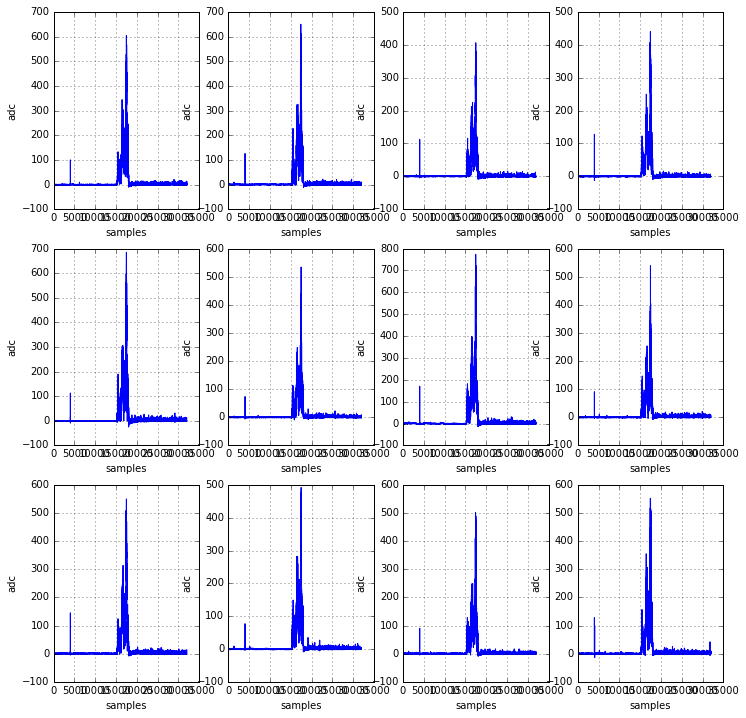

In [55]:
mpl.plot_waveforms(CWF, maxlen=0, zoom=False, window_size=3000)

In [56]:
def BLR(pmtrwf, DataPMT, n_baseline=28000, thr_trigger=5, deconv='v1', 
        plot=True, zoom=True, zoom_window=800, event_list=[0]):
    
    BSL =[]
    
    for event in event_list:    
        CWF, ACUM, BASELINE, BASELINE_END, NOISE_RMS   = deconv_pmt(pmtrwf, 
                                                                    DataPMT, 
                                                                    n_baseline=n_baseline, 
                                                                    thr_trigger=thr_trigger, 
                                                                    deconv=deconv,
                                                                    event=event)
        if plot:
            if zoom == False:
                mpl.plot_waveforms(CWF, maxlen=0, zoom=False)
            else:
                mpl.plot_waveforms(CWF, maxlen=0, zoom=True, window_size=zoom_window)
        
        
        BSL.append(np.abs(BASELINE-BASELINE_END))
        
        
    return zip(*BSL)

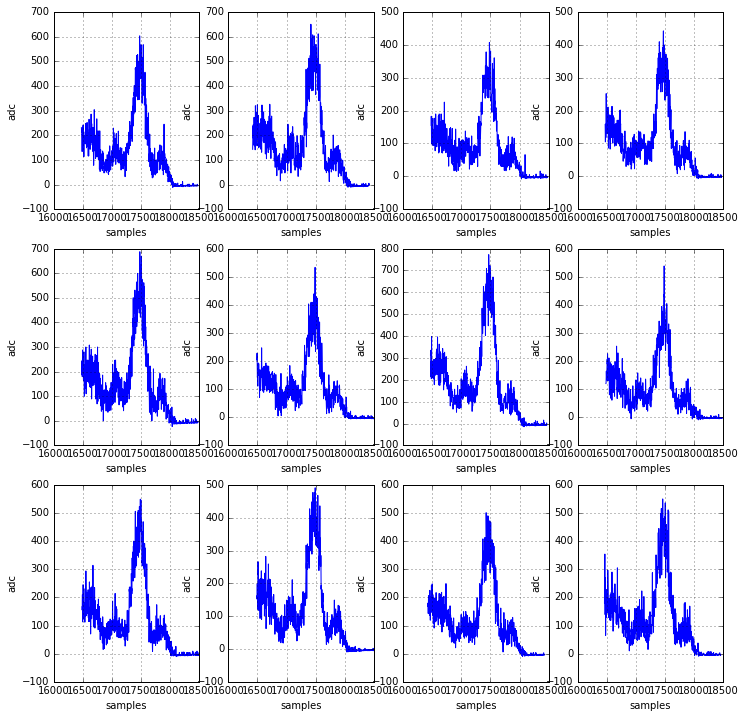

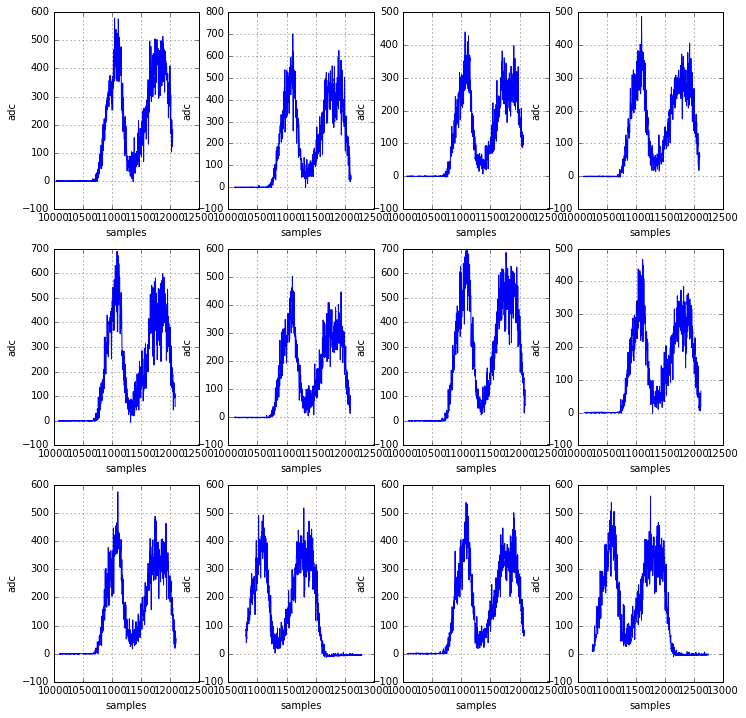

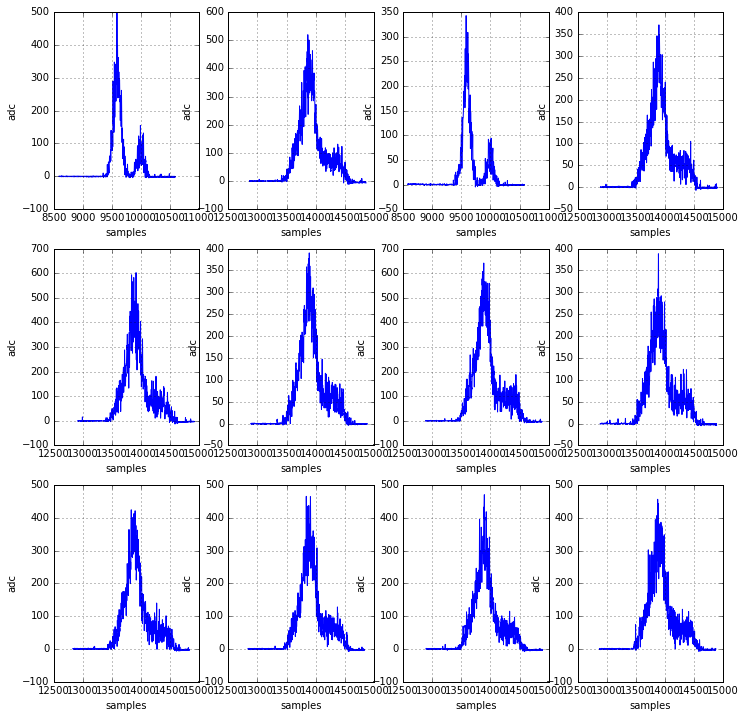

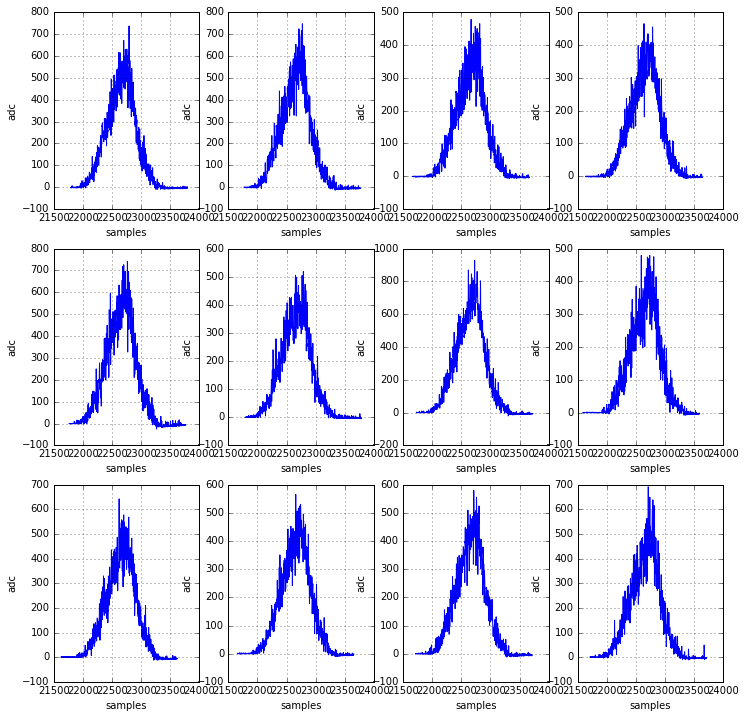

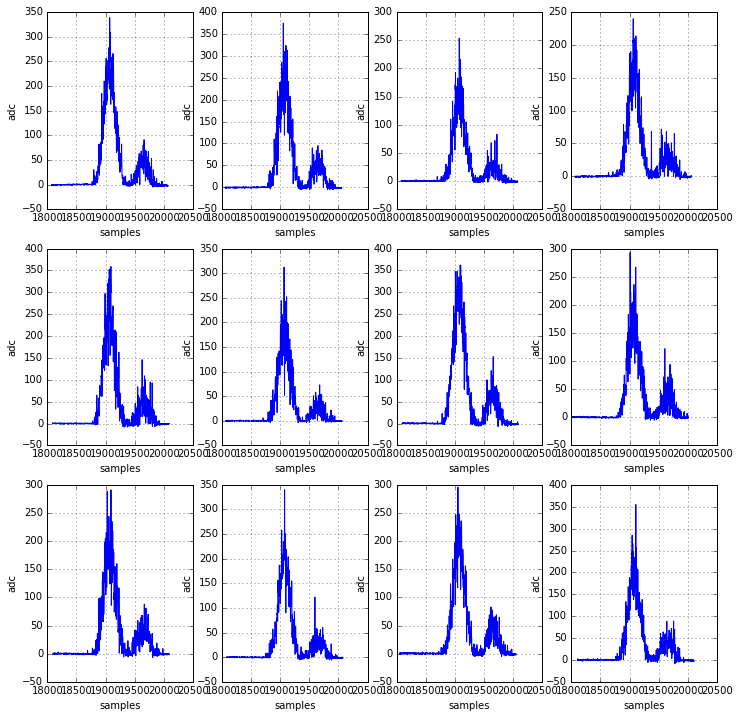

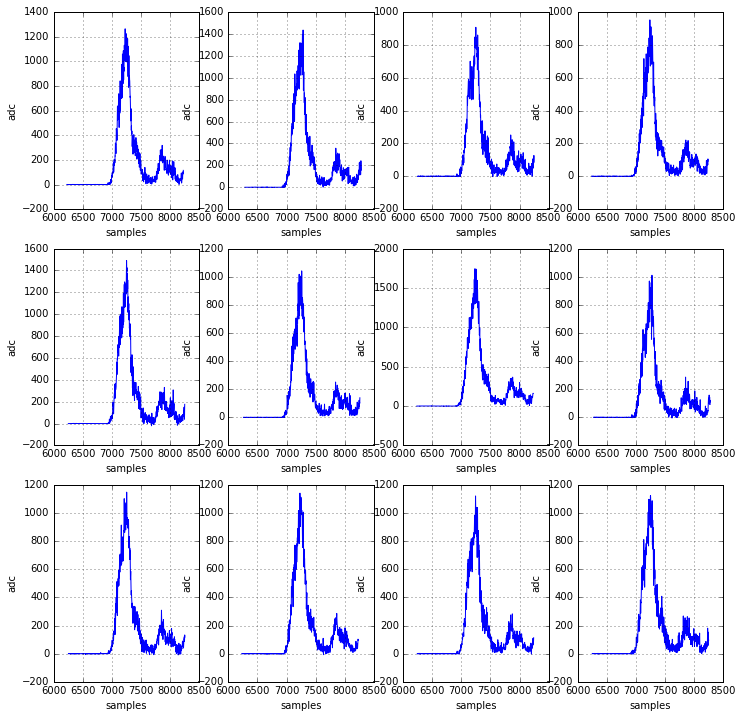

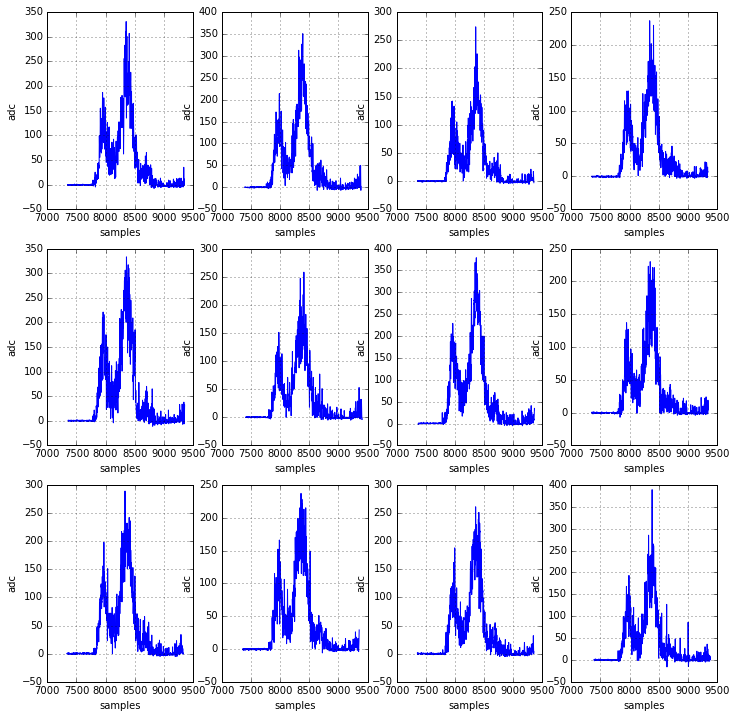

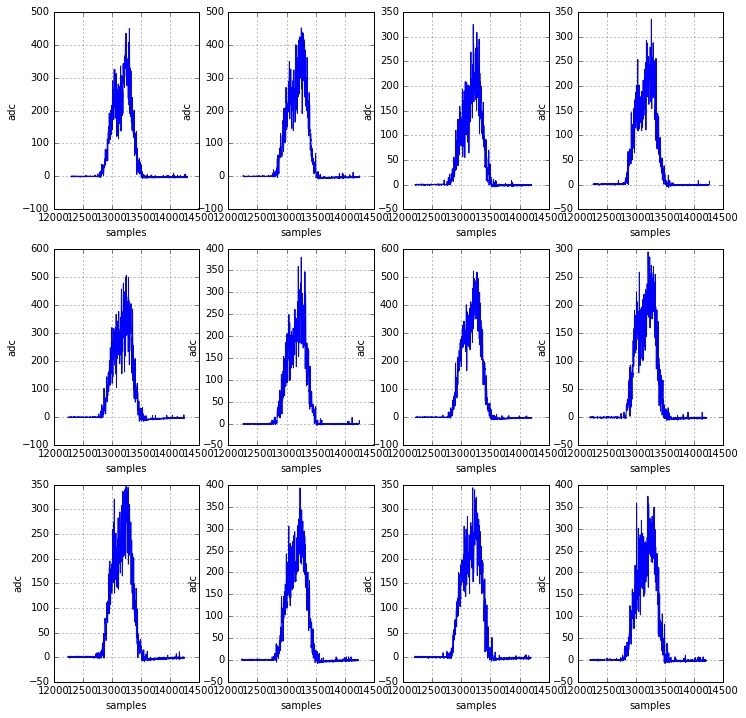

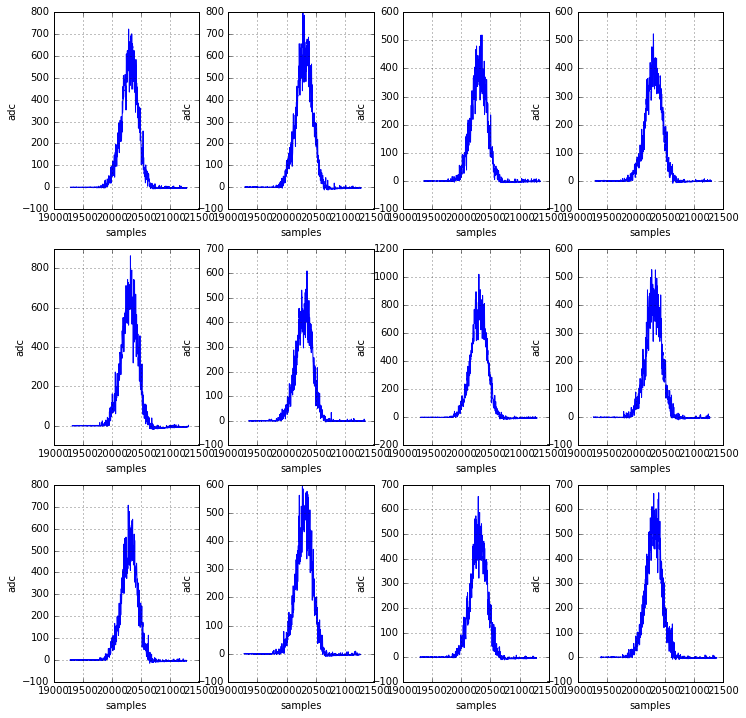

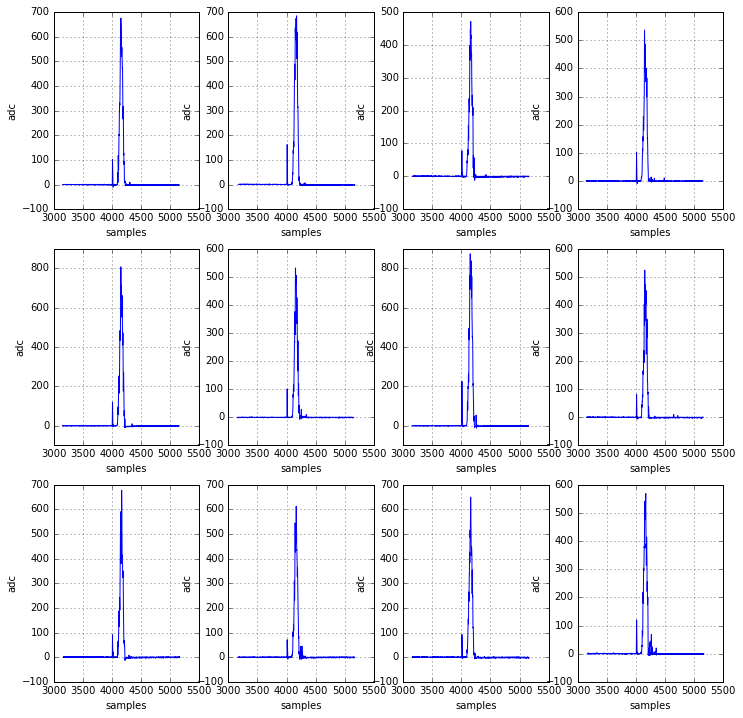

In [57]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=28000, thr_trigger=5, deconv='v1', 
        plot=True, zoom=True, zoom_window=1000, event_list=range(10))

In [64]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=31000, thr_trigger=5, deconv='v1', 
        plot=False, zoom=True, zoom_window=1000, event_list=range(100))

In [65]:
def histo_bsl(BSL, cutoff=10):
    """
    Takes as input a df storing the PMT wf and plots the 12 PMT WF
    """
    plt.figure(figsize=(12, 12))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        bsl = np.array(BSL[i])
        bslx = bsl[np.where(bsl<cutoff)]
        plt.hist(bslx,bins=10)
        print('for pmt = {} all events = {} outlayers = {}'.format(i, len(bsl), len(bsl) - len(bslx)))
    plt.show()
    

for pmt = 0 all events = 100 outlayers = 0
for pmt = 1 all events = 100 outlayers = 0
for pmt = 2 all events = 100 outlayers = 0
for pmt = 3 all events = 100 outlayers = 0
for pmt = 4 all events = 100 outlayers = 0
for pmt = 5 all events = 100 outlayers = 0
for pmt = 6 all events = 100 outlayers = 0
for pmt = 7 all events = 100 outlayers = 0
for pmt = 8 all events = 100 outlayers = 0
for pmt = 9 all events = 100 outlayers = 0
for pmt = 10 all events = 100 outlayers = 0
for pmt = 11 all events = 100 outlayers = 0


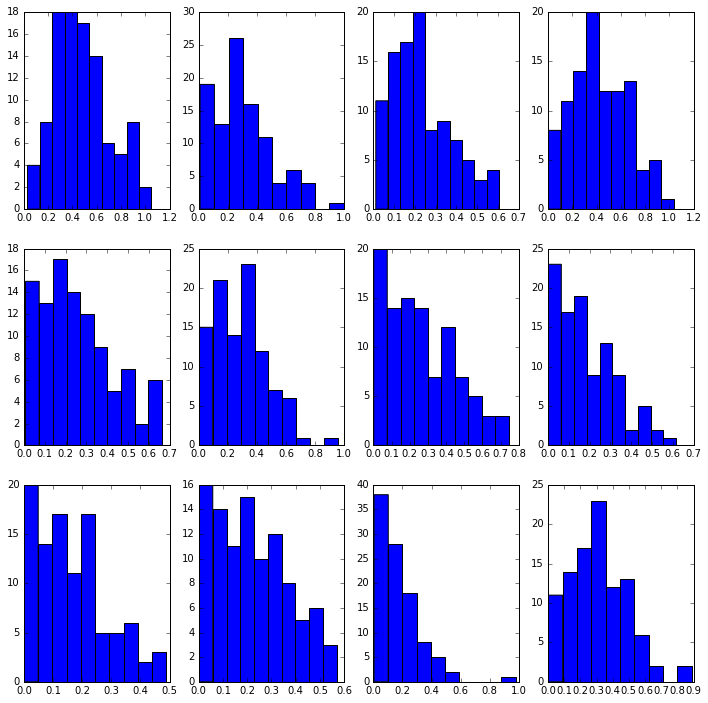

In [66]:
histo_bsl(bsl)

In [67]:
bsl2 = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v2', 
        plot=False, zoom=True, zoom_window=1000, event_list=range(100))

for pmt = 0 all events = 100 outlayers = 0
for pmt = 1 all events = 100 outlayers = 0
for pmt = 2 all events = 100 outlayers = 0
for pmt = 3 all events = 100 outlayers = 0
for pmt = 4 all events = 100 outlayers = 0
for pmt = 5 all events = 100 outlayers = 0
for pmt = 6 all events = 100 outlayers = 0
for pmt = 7 all events = 100 outlayers = 0
for pmt = 8 all events = 100 outlayers = 0
for pmt = 9 all events = 100 outlayers = 0
for pmt = 10 all events = 100 outlayers = 0
for pmt = 11 all events = 100 outlayers = 0


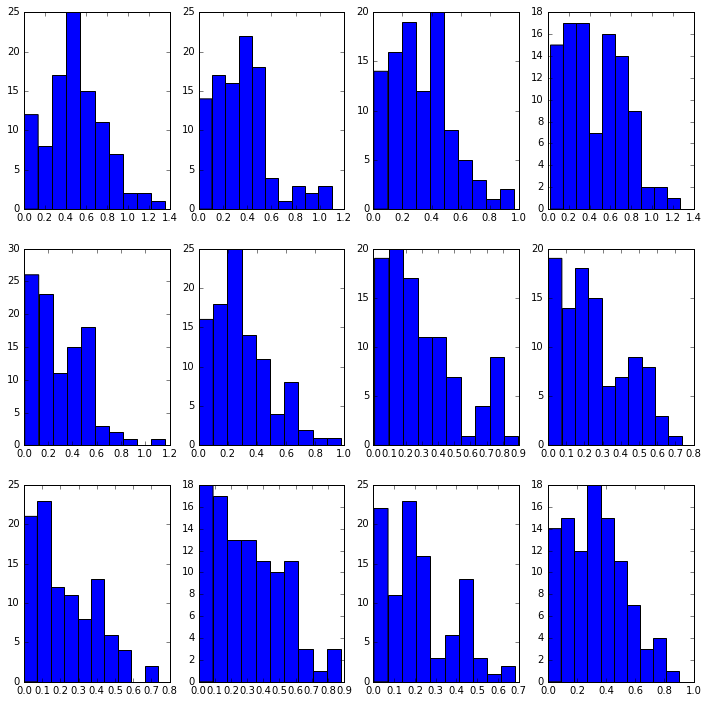

In [62]:
histo_bsl(bsl2)

In [68]:
def histo_overlap_bsl(BSL1, BSL2, cutoff=10):
    """
    Takes as input a df storing the PMT wf and plots the 12 PMT WF
    """
    plt.figure(figsize=(12, 12))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        bsl = np.array(BSL1[i])
        bslx1 = bsl[np.where(bsl<cutoff)]
        bsl = np.array(BSL2[i])
        bslx2 = bsl[np.where(bsl<cutoff)]
        plt.hist(bslx1,bins=10)
        plt.hist(bslx2,bins=10)
        
    plt.show()

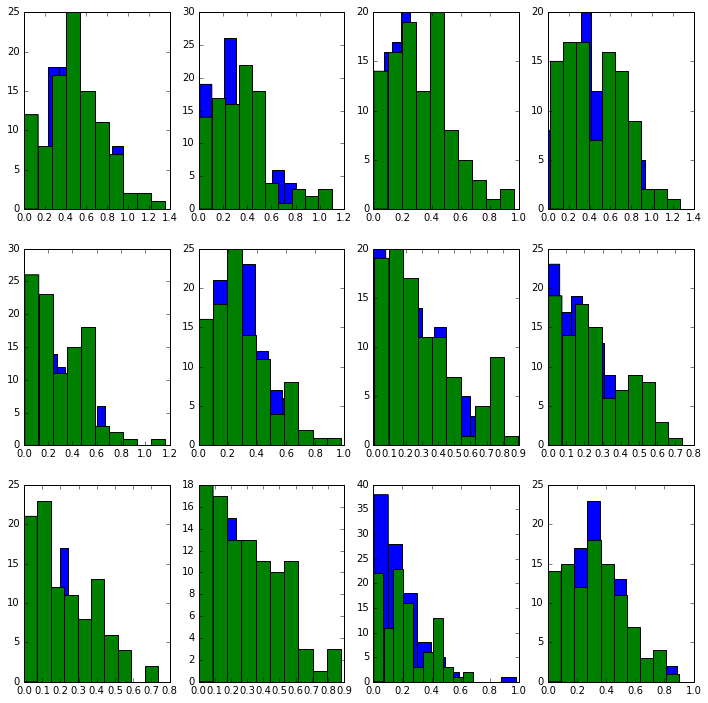

In [69]:
histo_overlap_bsl(bsl, bsl2, cutoff=10)

### Failed deconvolutions

In [60]:
pmtrwf = r2948_fail.root.RD.pmtrwf 

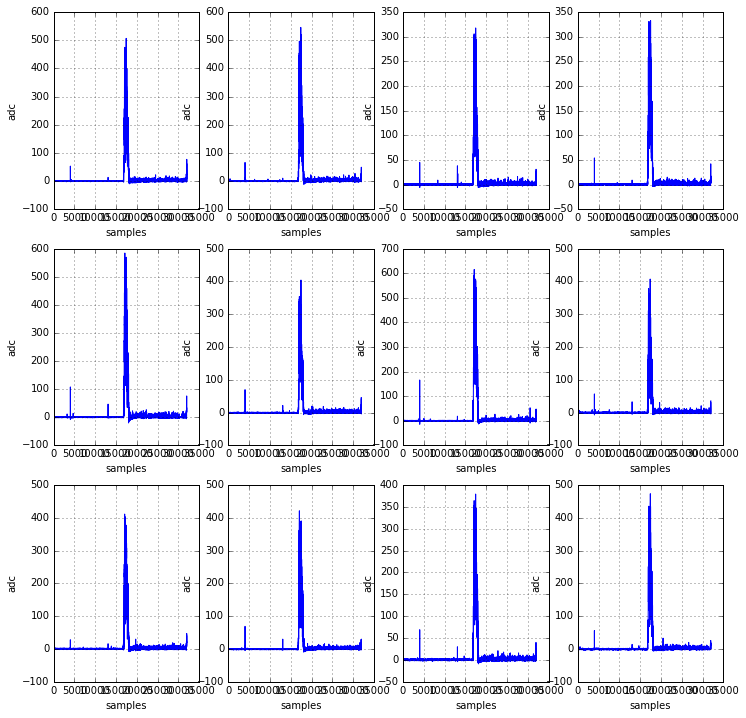

In [61]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[0])

#### not a failure. Average at the end of waveform has a small peak that distorts the average

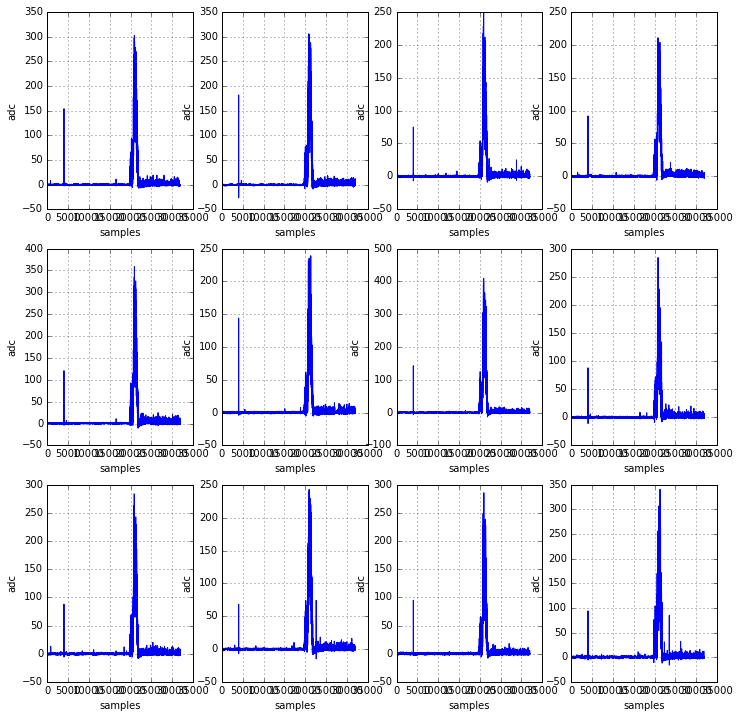

In [62]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[1])

### Not a failure! Result distorted by electron shower

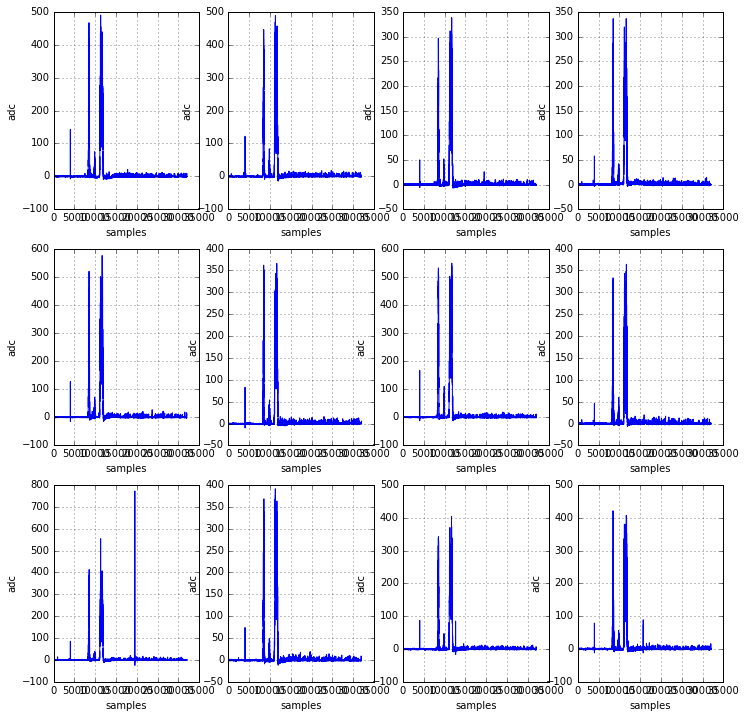

In [63]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[2])

#### Not a failure

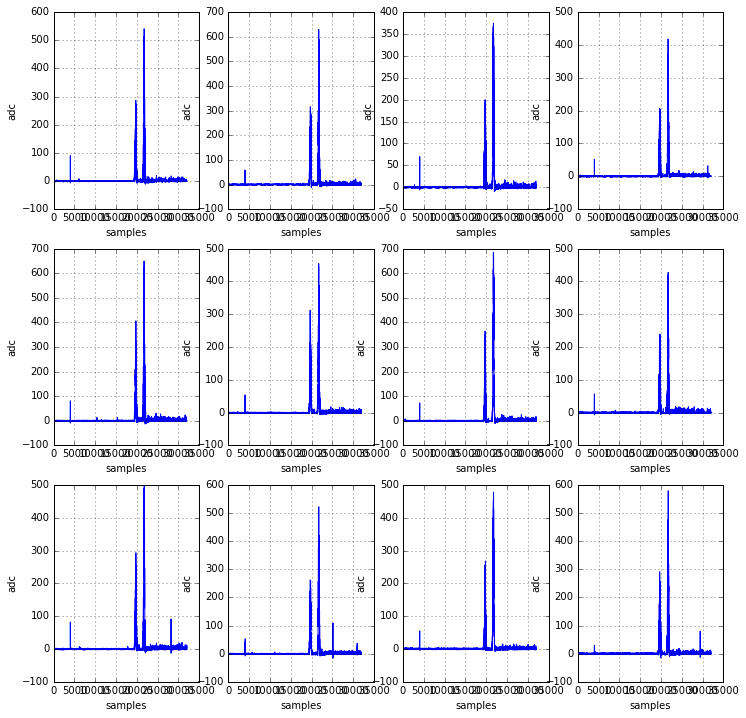

In [64]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[3])

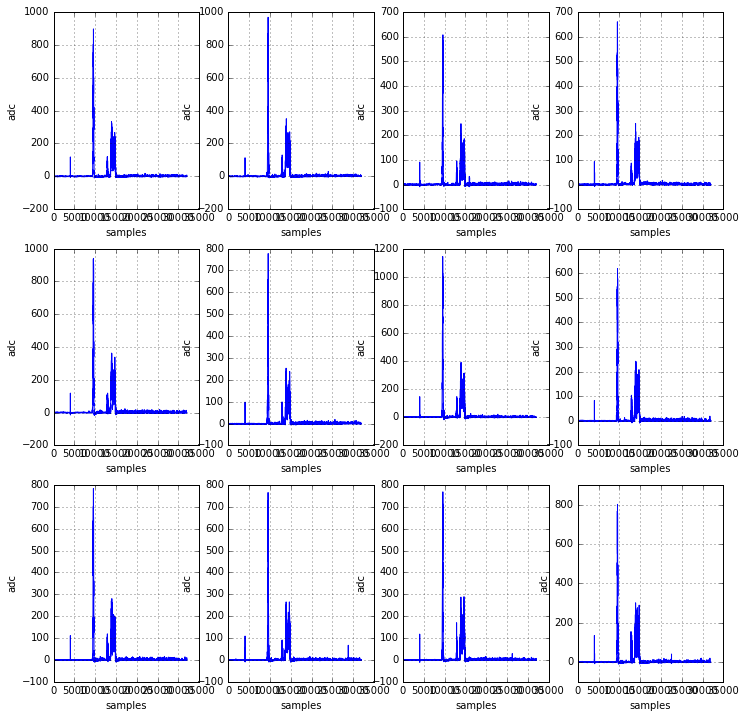

In [65]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[4])

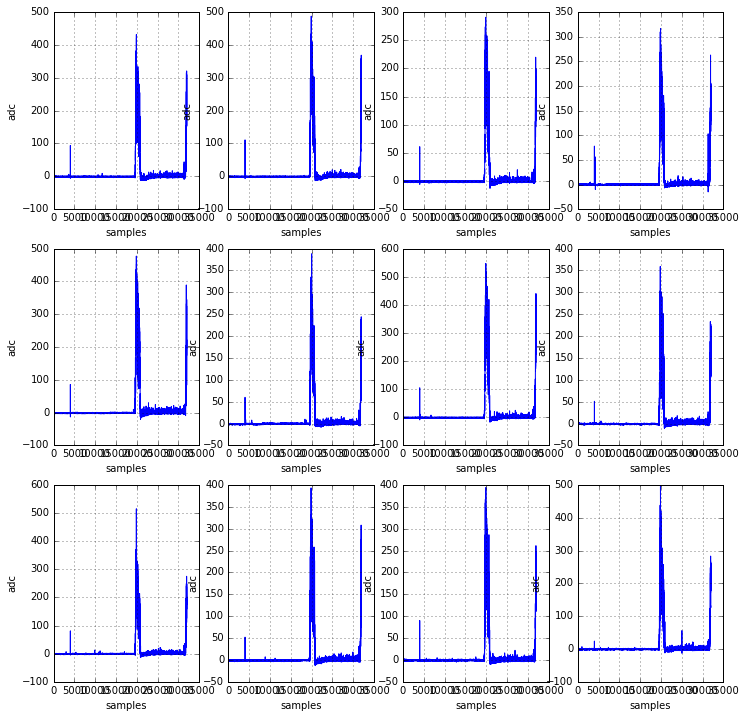

In [66]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[5])

#### Not a failure, a new peak coming in!

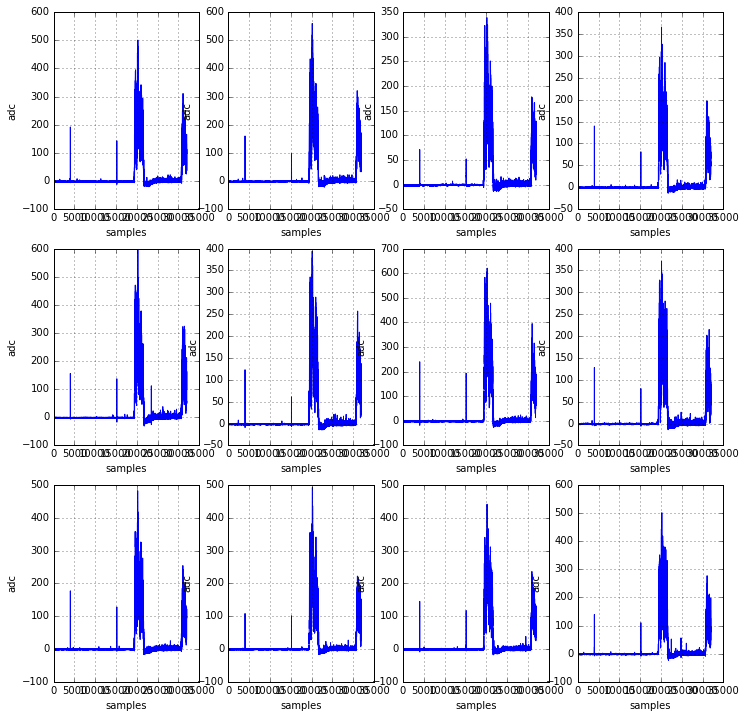

In [67]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[6])

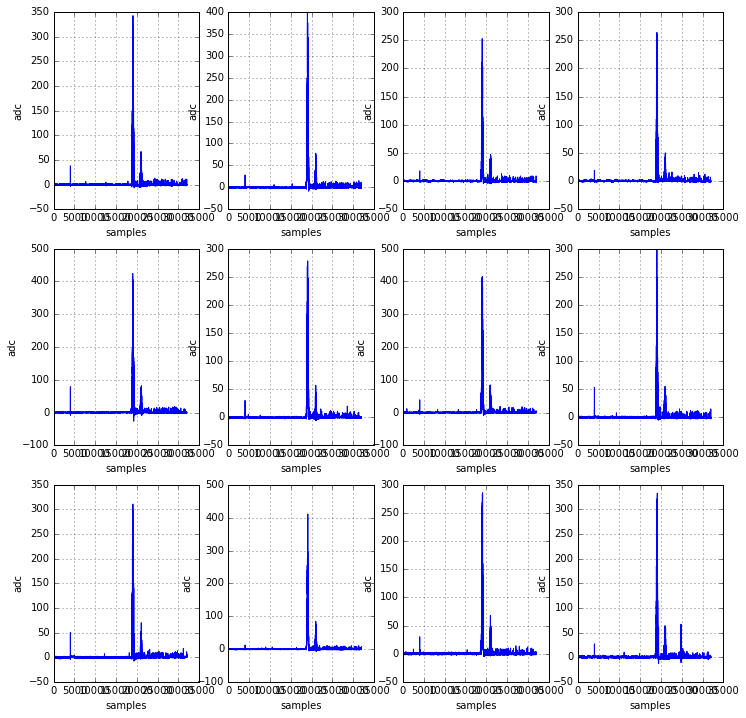

In [68]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[7])

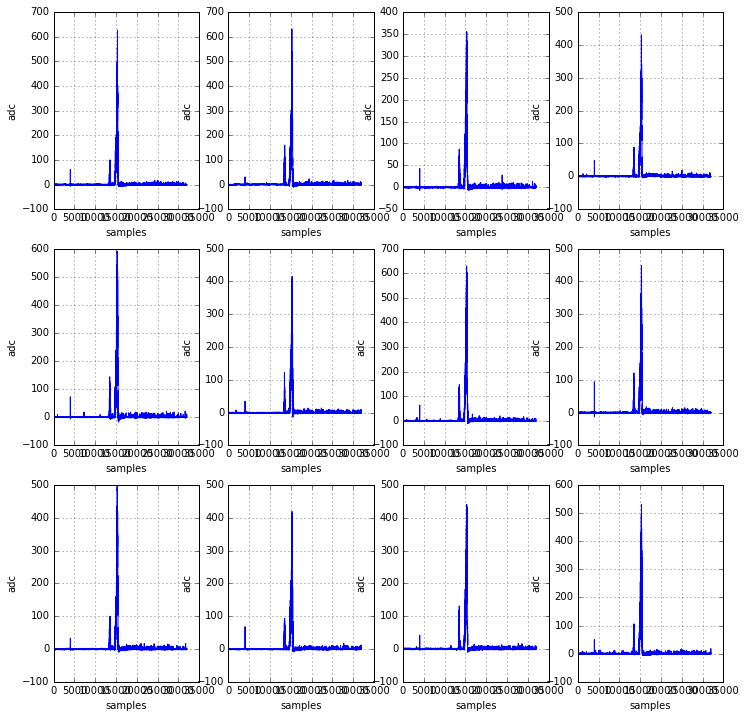

In [69]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[8])

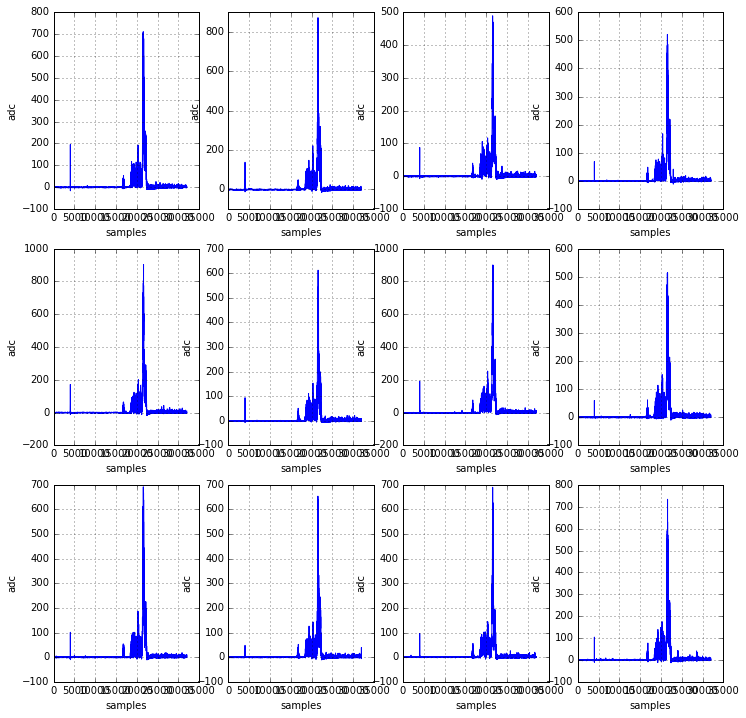

In [70]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[9])

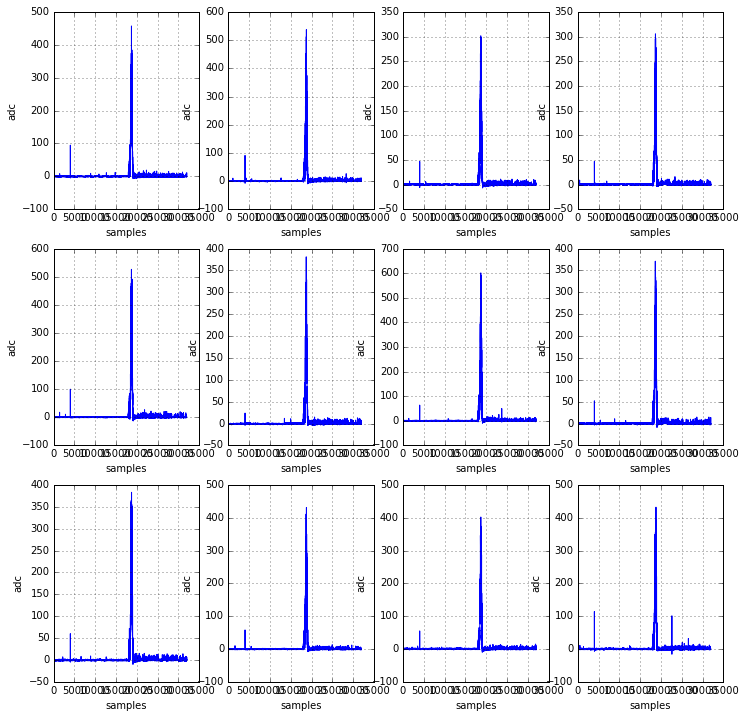

In [71]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[10])

### CONCLUSION! Failures are "fake". The algorithm works well in ~100 % of the cases (no uncontrolled raise of the baseline)

In [84]:
pmtrwf = r2948_fail2.root.RD.pmtrwf 

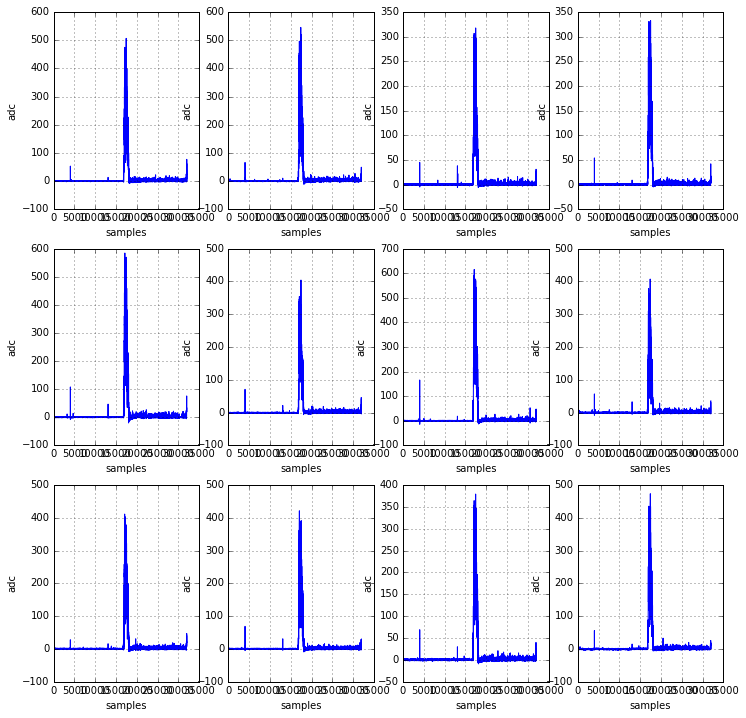

In [85]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=28000, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[0])

for pmt = 0 all events = 1 outlayers = 0
for pmt = 1 all events = 1 outlayers = 0
for pmt = 2 all events = 1 outlayers = 0
for pmt = 3 all events = 1 outlayers = 0
for pmt = 4 all events = 1 outlayers = 0
for pmt = 5 all events = 1 outlayers = 0
for pmt = 6 all events = 1 outlayers = 0
for pmt = 7 all events = 1 outlayers = 0
for pmt = 8 all events = 1 outlayers = 0
for pmt = 9 all events = 1 outlayers = 0
for pmt = 10 all events = 1 outlayers = 0
for pmt = 11 all events = 1 outlayers = 0


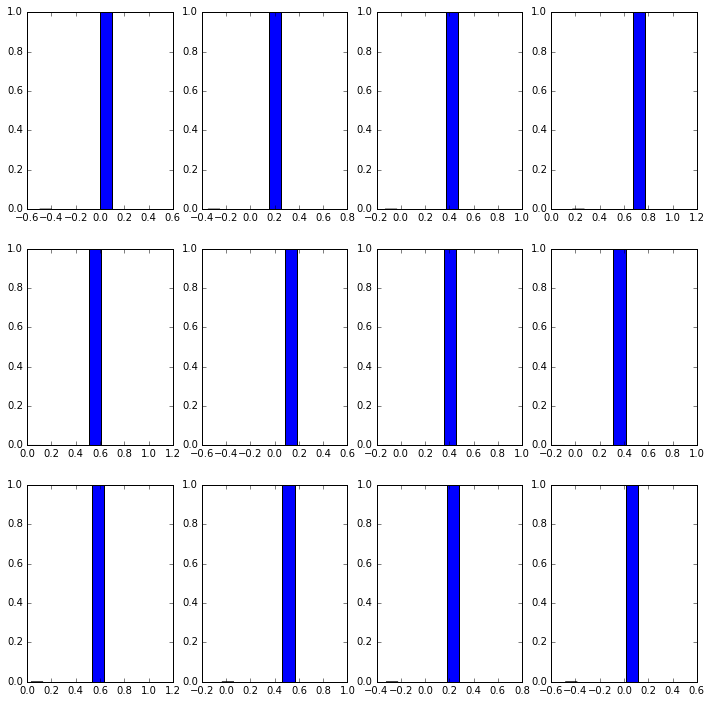

In [83]:
histo_bsl(bsl)

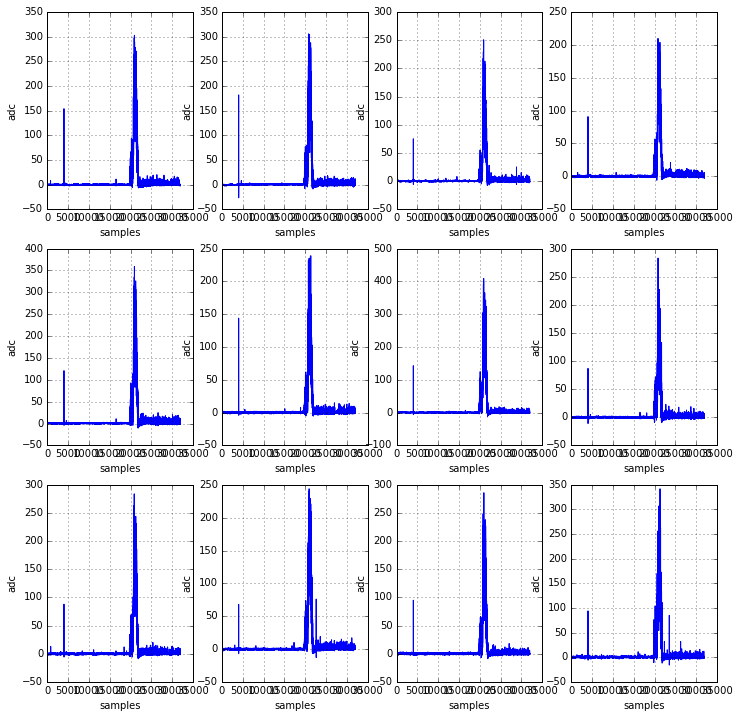

In [86]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=28000, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[1])

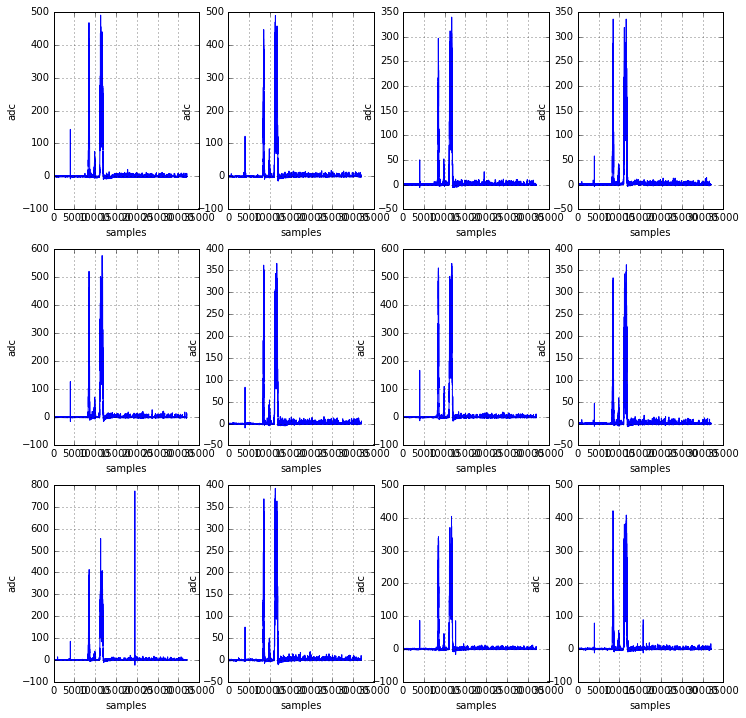

In [87]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=28000, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[2])

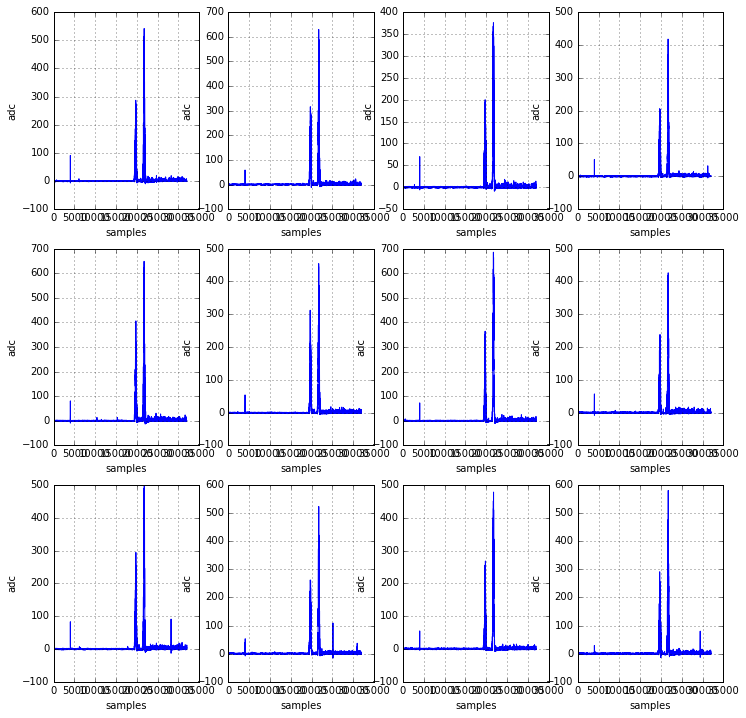

In [88]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=28000, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[3])

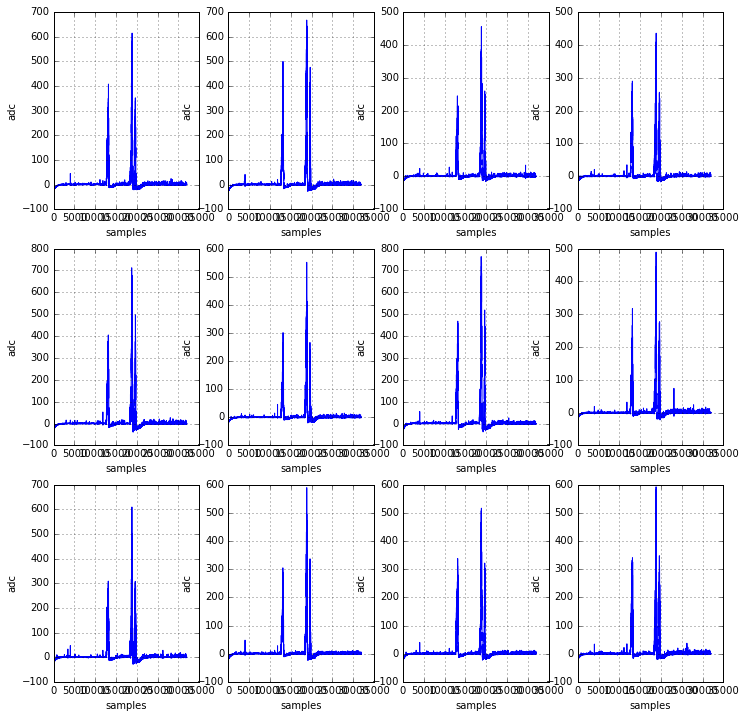

In [90]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=25000, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[4])

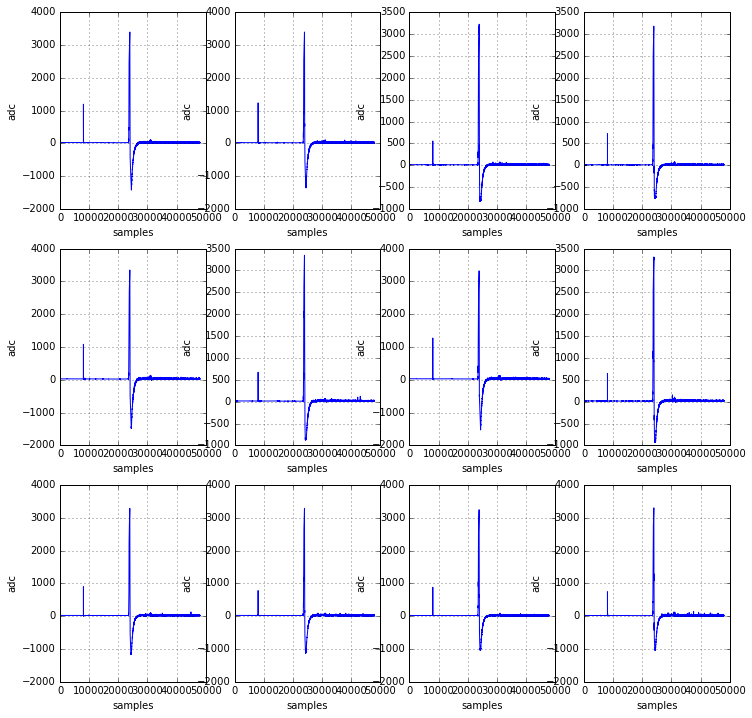

In [76]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=28000, thr_trigger=20, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[0])

## Run 2609 (Kripton)

In [72]:
ls '/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/LSC/run2609'

run_2609_kr.root.h5


In [73]:
r2609 = tables.open_file(pathlsc+'/run2609/run_2609_kr.root.h5','r+')

In [88]:
r2609_f = tables.open_file(pathlsc+'/tests/Kr_r2609_fail_deconv.h5','r+') 

In [75]:
pmtrwf = r2609.root.RD.pmtrwf

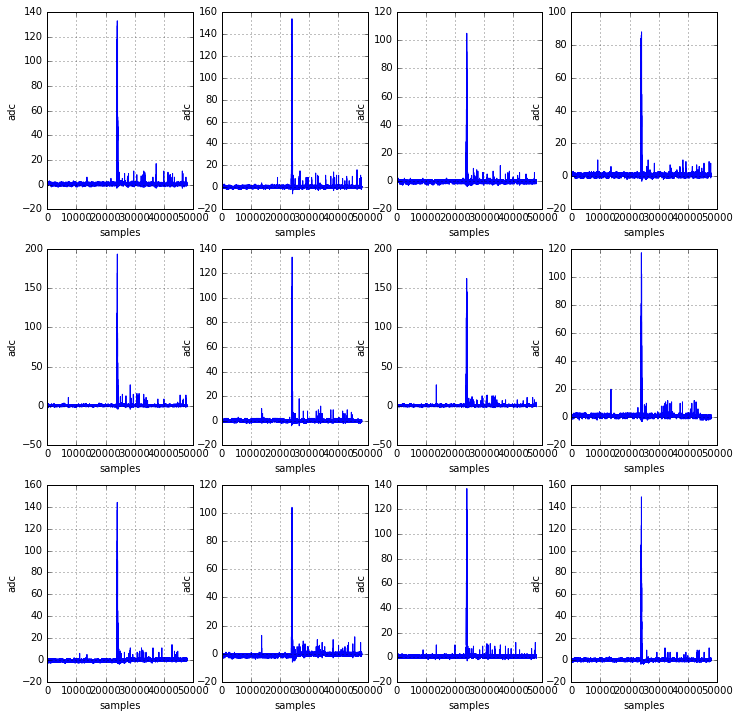

In [76]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[0])

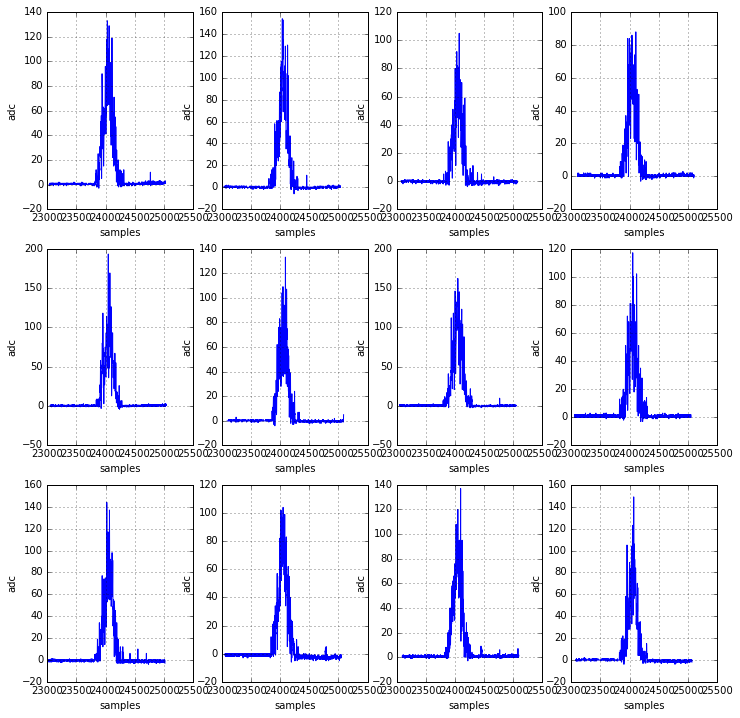

In [77]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=True, zoom_window=1000, event_list=[0])

In [82]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=False, zoom=False, zoom_window=1000, event_list=range(100))

In [83]:
bsl2 = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v2', 
        plot=False, zoom=False, zoom_window=1000, event_list=range(100))

for pmt = 0 all events = 100 outlayers = 5
for pmt = 1 all events = 100 outlayers = 5
for pmt = 2 all events = 100 outlayers = 2
for pmt = 3 all events = 100 outlayers = 2
for pmt = 4 all events = 100 outlayers = 5
for pmt = 5 all events = 100 outlayers = 3
for pmt = 6 all events = 100 outlayers = 5
for pmt = 7 all events = 100 outlayers = 3
for pmt = 8 all events = 100 outlayers = 4
for pmt = 9 all events = 100 outlayers = 3
for pmt = 10 all events = 100 outlayers = 4
for pmt = 11 all events = 100 outlayers = 3


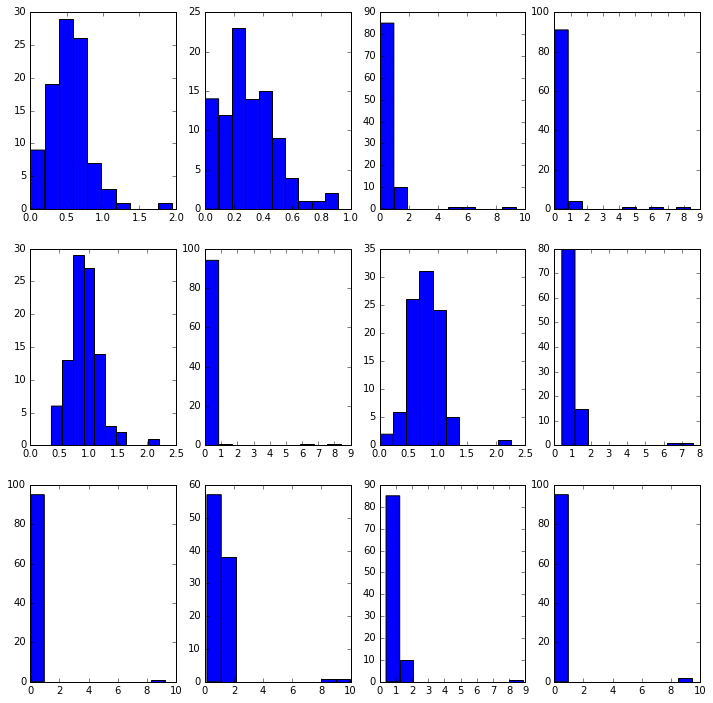

In [85]:
histo_bsl(bsl2)

for pmt = 0 all events = 100 outlayers = 5
for pmt = 1 all events = 100 outlayers = 5
for pmt = 2 all events = 100 outlayers = 2
for pmt = 3 all events = 100 outlayers = 2
for pmt = 4 all events = 100 outlayers = 5
for pmt = 5 all events = 100 outlayers = 3
for pmt = 6 all events = 100 outlayers = 5
for pmt = 7 all events = 100 outlayers = 3
for pmt = 8 all events = 100 outlayers = 4
for pmt = 9 all events = 100 outlayers = 3
for pmt = 10 all events = 100 outlayers = 4
for pmt = 11 all events = 100 outlayers = 3


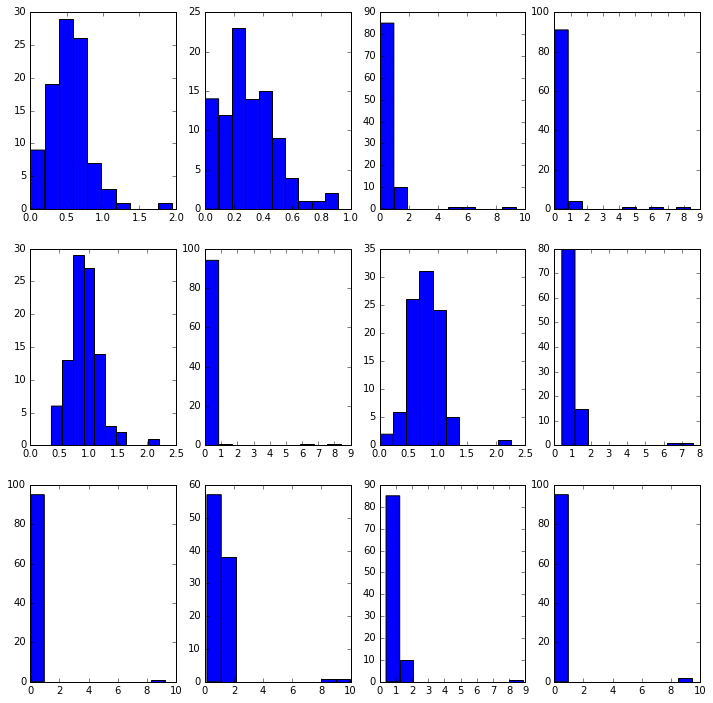

In [84]:
histo_bsl(bsl)

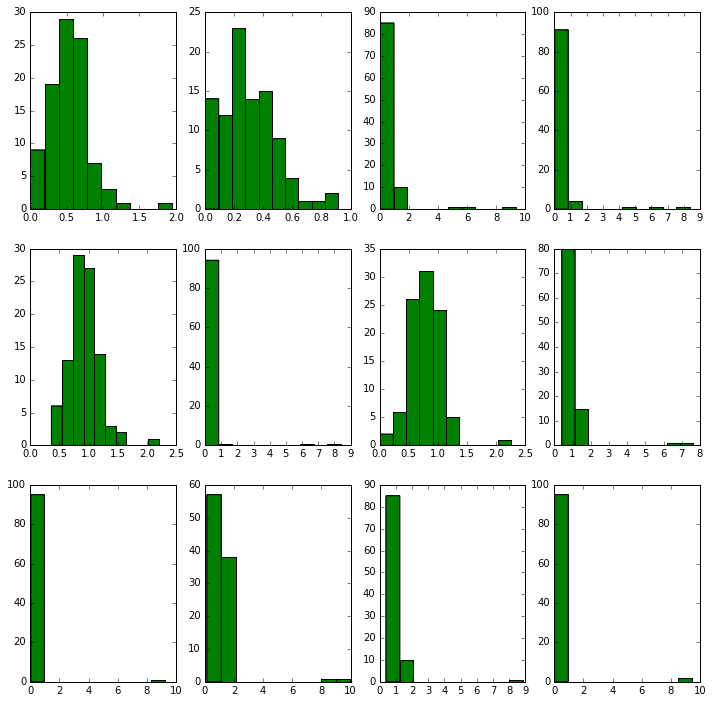

In [86]:
histo_overlap_bsl(bsl, bsl2, cutoff=10)

In [89]:
pmtrwf = r2609_f.root.RD.pmtrwf

In [90]:
r2609_f

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/LSC//tests/Kr_r2609_fail_deconv.h5, title=Filters(complevel=4, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None), mode='r+', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) Filters(complevel=4, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None)
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
  description := {
  "x_det": Float32Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float32Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float32Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float32Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (2340,)
/RD (Group) ''
/RD/pmtblr (EArray(34, 12, 48000), shuffle, zlib(4)) ''
  atom := Int16Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 2, 48000)
/RD/pmtcwf (EArray(34, 

In [139]:
pmtrwf = r2609_f.root.RD.pmtrwf

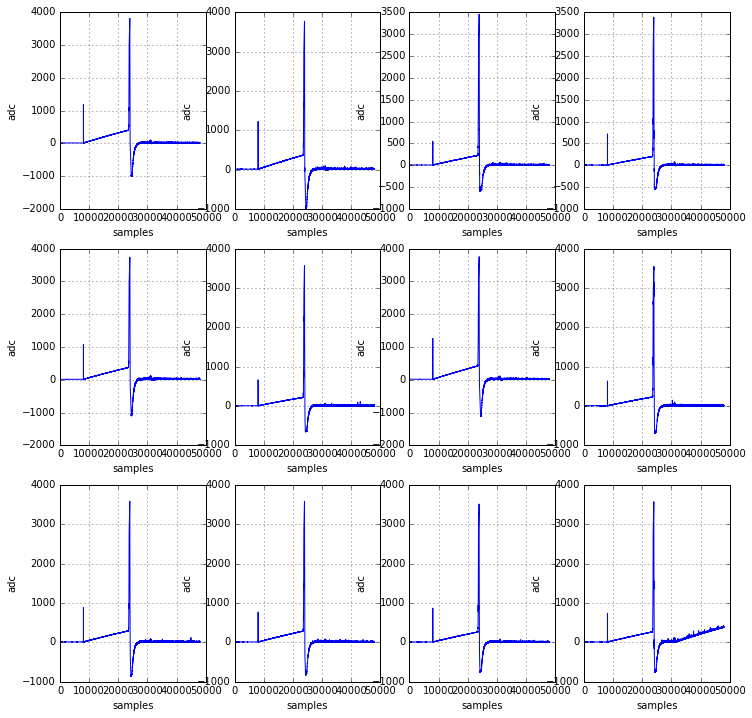

In [92]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[0])

In [144]:
signal_r, acum, baseline, baseline_end, noise_rms = cblr.deconvolve_signal_acum(pmtrwf[0,0],
                                                                                  n_baseline=500,
                                                                                  coef_clean=DataPMT.coeff_c[pmt],
                                                                                  coef_blr=DataPMT.coeff_blr[pmt],
                                                                                  thr_trigger=20,
                                                                                  acum_discharge_length = 5000)

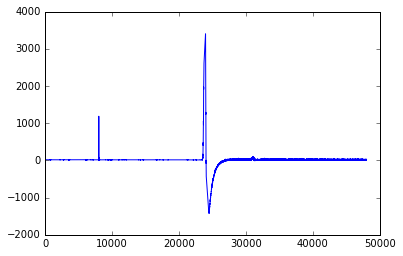

In [143]:
plt.plot(signal_r)

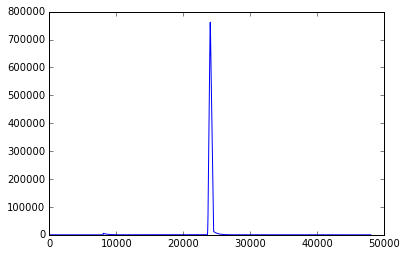

In [145]:
plt.plot(acum)

In [96]:
baseline

2537.12451171875

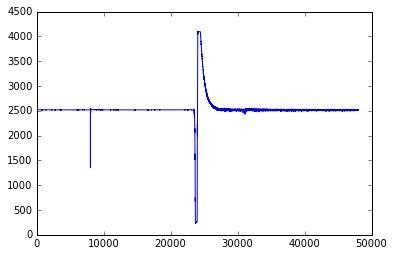

In [146]:
plt.plot(pmtrwf[0,0])

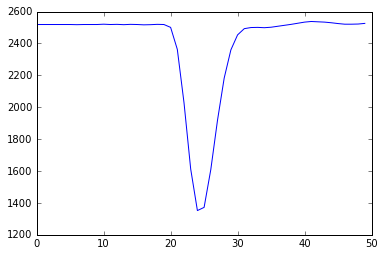

In [152]:
plt.plot(pmtrwf[0,0][8000:8050])

In [151]:
7./0.0015

4666.666666666667

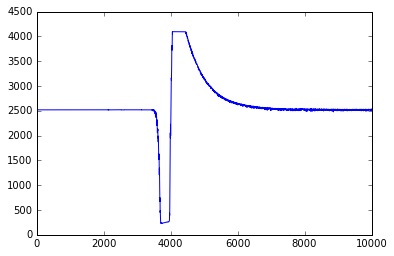

In [156]:
plt.plot(pmtrwf[0,0][20000:30000])

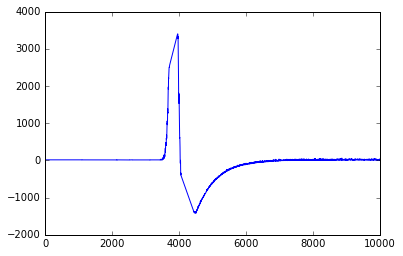

In [155]:
plt.plot(signal_r[20000:30000])

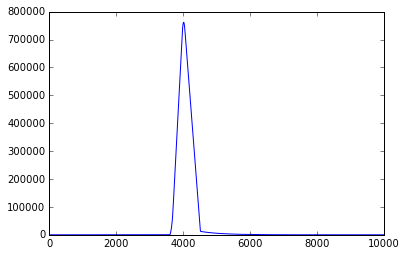

In [154]:
plt.plot(acum[20000:30000])

In [107]:
signal_r, acum, baseline, baseline_end, noise_rms = cblr.deconvolve_signal_acum_v2(pmtrwf[0,0],
                                                                                  n_baseline=500,
                                                                                  coef_clean=DataPMT.coeff_c[pmt],
                                                                                  coef_blr=DataPMT.coeff_blr[pmt],
                                                                                  thr_trigger=7,
                                                                                  acum_discharge_length = 5000)

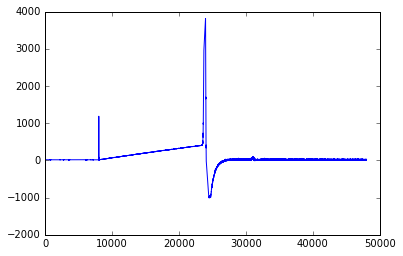

In [108]:
plt.plot(signal_r)

In [111]:
%%cython
import numpy as np
cimport numpy as np
from scipy import signal as SGN
cpdef deconvolve_signal_acum(np.ndarray[np.int16_t, ndim=1] signal_i,
                            int n_baseline=500,
                            float coef_clean=2.905447E-06,
                            float coef_blr=1.632411E-03,
                            float thr_trigger=5,
                            int acum_discharge_length = 5000):

    """
    The accumulator approach by Master VHB
    decorated and cythonized  by JJGC
    22.11 Compute baseline using all the waveforms
          computes accumulator threshold from thr_trigger
          simplify discharge wrt previous versions:
    In this verison the recovered signal and the accumulator are
    always being charged. At the same time, the accumulator is being
    discharged when there is no signal. This avoids runoffs
    """

    cdef float coef = coef_blr
    cdef int nm = n_baseline
    cdef float thr_acum = thr_trigger/coef
    cdef int len_signal_daq = len(signal_i)

    cdef np.ndarray[np.float64_t, ndim=1] signal_r = np.zeros(len_signal_daq,
                                                              dtype=np.double)
    cdef np.ndarray[np.float64_t, ndim=1] acum = np.zeros(len_signal_daq,
                                                          dtype=np.double)
    # signal_daq in floats
    cdef np.ndarray[np.float64_t, ndim=1] signal_daq = signal_i.astype(float)

    # compute baseline and noise

    cdef int j
    cdef float baseline = 0.
    cdef float baseline_end = 0.

    for j in range(0,len_signal_daq):
        baseline += signal_daq[j]
    baseline /= len_signal_daq

    for j in range(len_signal_daq-nm, len_signal_daq):
        baseline_end += signal_daq[j]
    baseline_end /= nm

    # reverse sign of signal and subtract baseline
    signal_daq =  baseline - signal_daq

    # compute noise
    cdef float noise =  0.
    for j in range(0,nm):
        noise += signal_daq[j]*signal_daq[j]
    noise /= nm
    cdef float noise_rms = np.sqrt(noise)

    # trigger line

    cdef float trigger_line
    trigger_line = thr_trigger*noise_rms

    # cleaning signal
    cdef np.ndarray[np.float64_t, ndim=1] b_cf
    cdef np.ndarray[np.float64_t, ndim=1] a_cf

    b_cf, a_cf = SGN.butter(1, coef_clean, 'high', analog=False);
    signal_daq = SGN.lfilter(b_cf,a_cf,signal_daq)

    cdef int k
    j=0
    for k in range(0,len_signal_daq):

        # always update signal and accumulator
        signal_r[k] = signal_daq[k] + signal_daq[k]*(coef/2.0) +\
                      coef_blr * acum[k-1]

        acum[k] = acum[k-1] + signal_daq[k]

        if (signal_daq[k] < trigger_line) and (acum[k-1] < thr_acum):
            # discharge accumulator

            if acum[k-1]>1:
                acum[k] = acum[k-1] * (1. - coef)
                if j < acum_discharge_length - 1:
                    j = j + 1
                else:
                    j = acum_discharge_length - 1
            else:
                acum[k]=0
                j=0
    # return signal and friends
    return signal_r.astype(int), acum.astype(int), baseline, baseline_end, noise_rms


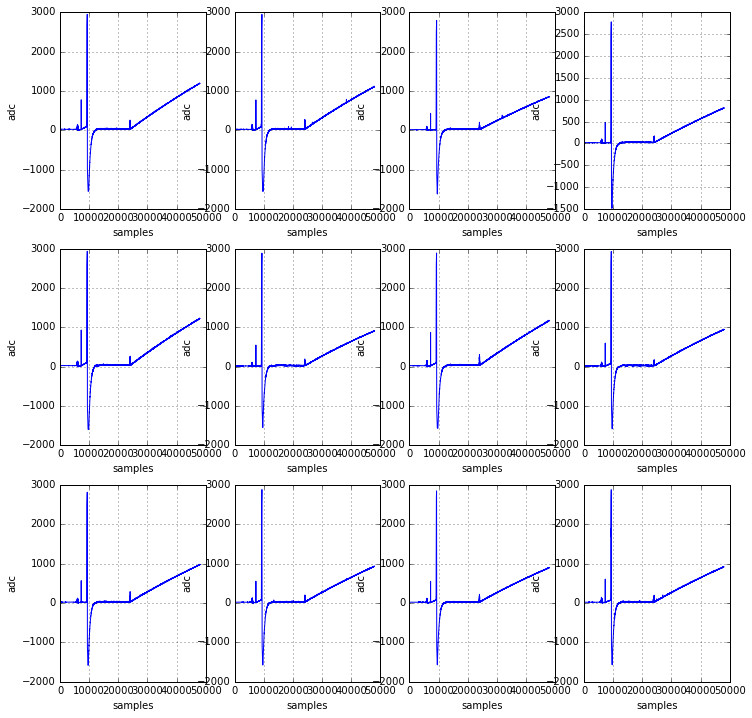

In [106]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[1])

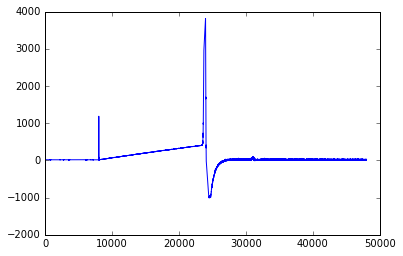

In [112]:
plt.plot(signal_r)

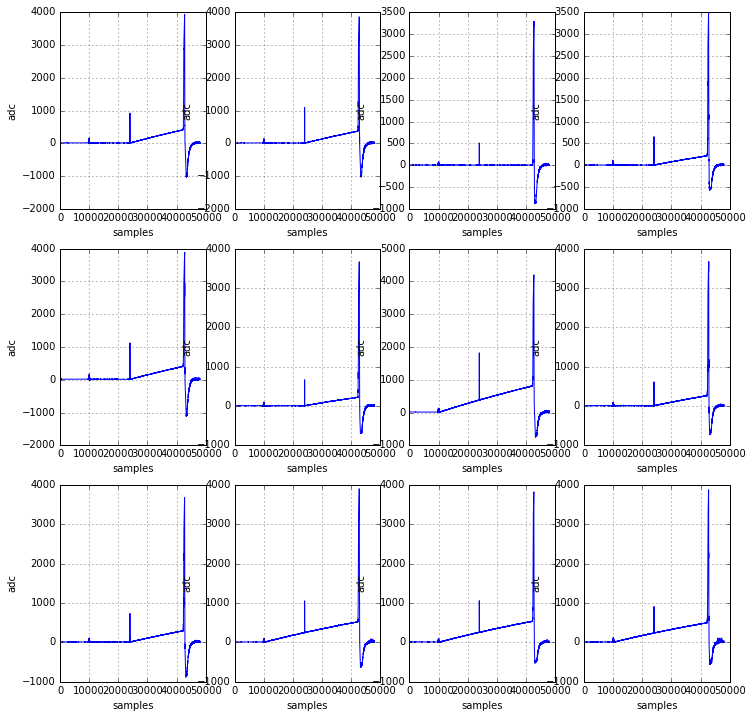

In [113]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[2])

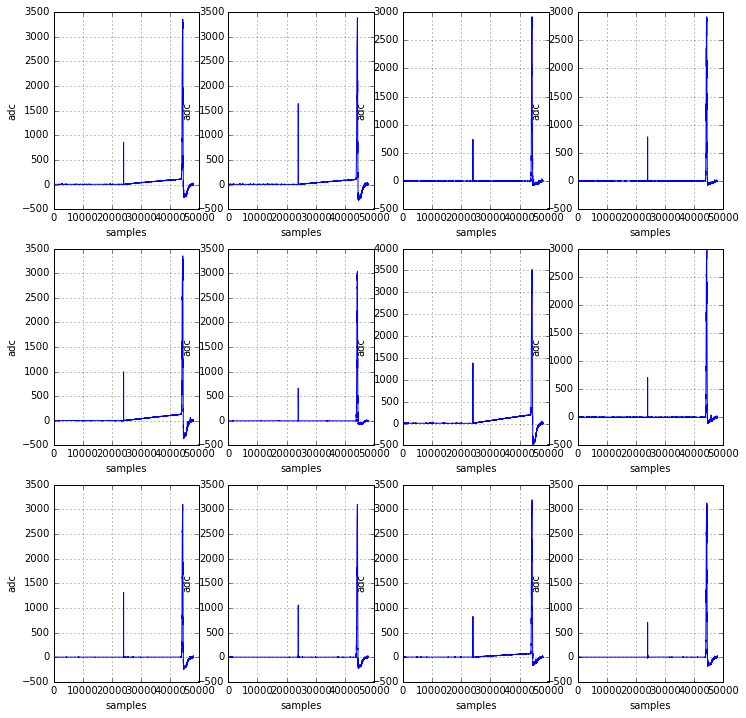

In [114]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[3])

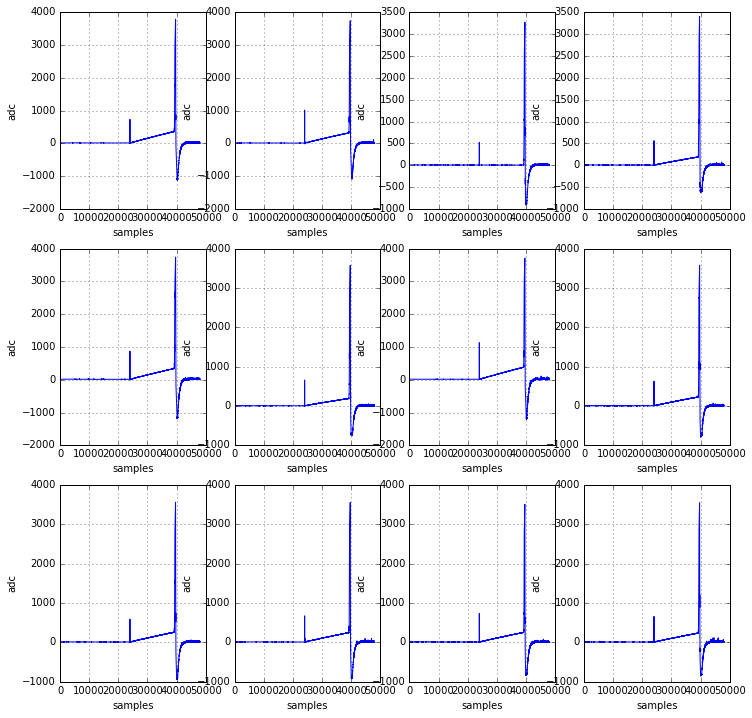

In [115]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[4])

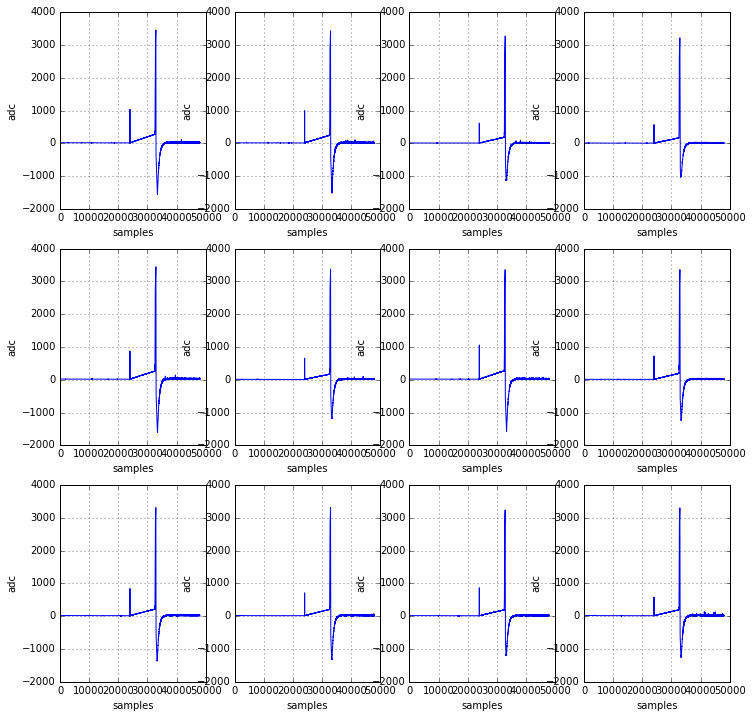

In [116]:
bsl = BLR(pmtrwf, DataPMT, n_baseline=500, thr_trigger=5, deconv='v1', 
        plot=True, zoom=False, zoom_window=1000, event_list=[5])

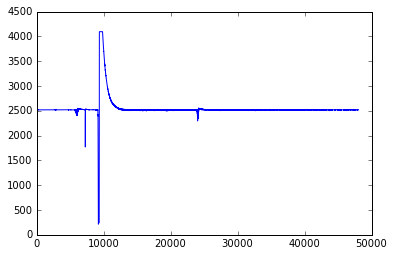

In [157]:
plt.plot(pmtrwf[1,0])

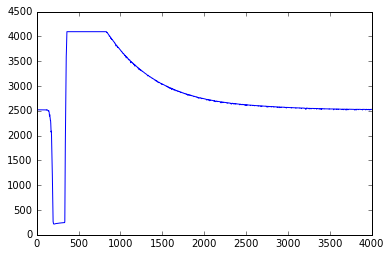

In [158]:
plt.plot(pmtrwf[1,0][9000:13000])

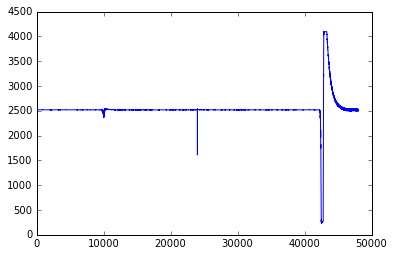

In [159]:
plt.plot(pmtrwf[2,0])

In [167]:
def gotcha(pmtrwf, cutoff=1000):
    ipmt=0
    for event in range(pmtrwf.shape[0]):
        if np.max(pmtrwf[event,0])<cutoff:
            print(event) 

In [168]:
gotcha(pmtrwf)

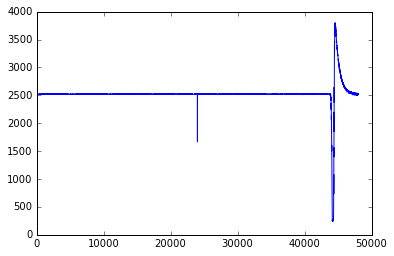

In [164]:
plt.plot(pmtrwf[3,0])

### Events have all the same pathology. They are alpha particles!